In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

# Random Walk Lab

### Learning goals - *Random walk lab*

|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will get practice working with and visualizing multi-dimensional data arrays in the context of an actual simulation.</div> | If you learn anything about random walks or diffusion, that's an added bonus. |

# 1-D discrete random walk

<img src="images/random-walk-1d.gif" width="100%">

Consider a bunch of particles randomly hopping around on a one-dimensional lattice.

Each particle starts at position 0.

During each time step of the simulation each particle has equal probability to move either -1, 0, or +1 along the lattice.

Start by importing the packages we will need and setting up your plot style.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("bmh")
plt.rcParams['lines.linewidth'] = 1

### Step 1. Decide how you are going to store the data for the simulation.

You could use a single array that holds the current position of each particle.


<img src="images/random-walk-1d-1darray-t0.drawio.svg" width="100%">

In [3]:
# number of particles
N = 1000

# start all particles at position 0
positions = np.zeros(N, dtype=int)

### Step 2. Decide how you are going to update the simulation on each time step.

Now for the simulation all you have to do is randomly move each particle by -1, 0, or +1 on each time step.

After the first time step...

<img src="images/random-walk-1d-1darray-t1.drawio.svg" width="100%">

In [4]:
random_move = np.random.choice([-1, 0, 1])

random_move

1

After the second time step...

<img src="images/random-walk-1d-1darray-t2.drawio.svg" width="100%">

In [5]:
random_move = np.random.choice([-1, 0, 1])

random_move

1

At the end of T time steps (0 to T-1)...

<img src="images/random-walk-1d-1darray-tT-1.drawio.svg" width="100%">

### Step 3. Code your simulation.

Let's write a function that performs the above simulation.

We'll code the function in the next cell together.

*If you get stuck, you can look at my example fully coded function that follows, but try and work it out on your own first.*

In [6]:
def random_walk_1d():
    
    pass  # we'll code this together...
    
    # Notes for teaching:
    # - For now, update one particle at a time.
    # - Start without and then use input parameters.
    # - What does the function need to return?

*Example completed function...*

In [7]:
def random_walk_1d(n_particles, n_steps):
    
    # All particles start at position 0
    positions = np.zeros(n_particles, dtype=int)
    
    # for each time step (t = time step index)...
    for t in range(n_steps):
        
        # for each particle (i = particle index)...
        for i in range(n_particles):
            
            random_move = np.random.choice([-1, 0, 1])
            
            # add random move to particle i's position
            positions[i] += random_move
    
    return positions

### Step 4. Test your simulation.

Test run your simulation for a small number of particles and time steps. Does everything make sense? Or is it behaving in an unexpected manner?

In [8]:
p0 = random_walk_1d(n_particles=5, n_steps=0)
p1 = random_walk_1d(n_particles=5, n_steps=1)
p2 = random_walk_1d(n_particles=5, n_steps=2)
p1000 = random_walk_1d(n_particles=5, n_steps=1000)

p0, p1, p2, p1000

(array([0, 0, 0, 0, 0]),
 array([ 1, -1, -1,  1, -1]),
 array([2, 1, 2, 0, 1]),
 array([ 2,  3,  1, 66, 25]))

Ok, looks good. However, for each simulation you have only stored the final positions of the particles. What if you want access to the history of particle positions throughout the entire simulation?

*How could you keep track of each particle's position throughout the entire simulation?*

You could use a 2-D array with each row being all particle positions at a single time point in the simulation.

<img src="images/random-walk-1d-2darray.drawio.svg" width="50%">

Let's change the simulation code to keep track of the history of particle positions.

In [9]:
def random_walk_1d(n_particles, n_steps):
    
    # Allocate memory for n_steps x n_particles array.
    # Each row is all particle positions for a single time step.
    # First row is starting particle positions (all at 0)
    positions = np.zeros([n_steps, n_particles], dtype=int)
    
    # for each time step after the start...
    for t in range(1, n_steps):
        
        # for each particle...
        for i in range(n_particles):
            
            random_move = np.random.choice([-1, 0, 1])
            
            # add random move to particle i's previous position
            positions[t,i] = positions[t-1,i] + random_move
    
    return positions

Test run your simulation for a small number of particles and time steps.

In [10]:
pos = random_walk_1d(n_particles=5, n_steps=15)
pos

array([[ 0,  0,  0,  0,  0],
       [ 0, -1,  1, -1,  1],
       [ 1,  0,  0, -1,  2],
       [ 0,  0,  0, -2,  1],
       [-1,  1, -1, -2,  1],
       [-1,  1, -2, -1,  2],
       [-2,  0, -2,  0,  3],
       [-2,  0, -1, -1,  4],
       [-3,  1,  0, -2,  5],
       [-3,  2, -1, -3,  5],
       [-2,  2, -1, -2,  4],
       [-3,  3, -1, -3,  5],
       [-2,  2,  0, -3,  6],
       [-1,  3,  1, -3,  5],
       [-1,  4,  1, -3,  5]])

Now run the simulation for more particles and time steps.

In [11]:
pos = random_walk_1d(n_particles=500, n_steps=1000)

pos.shape

(1000, 500)

In [12]:
# Positions across time steps
# for the first five particles.
pos[:,:5]

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,  -1,   1],
       [ -1,   0,  -1,   0,   1],
       ...,
       [ 35, -11,  -8, -27,  29],
       [ 36, -12,  -9, -27,  30],
       [ 37, -13, -10, -27,  29]])

Ok, so your simulation runs, but it is **VERY SLOW**!!!

If you had to run with a lot more particles and/or for many more time steps this would quickly become unbearable.

Let's see if we can leverage *NumPy to make this MUCH FASTER*.

In [13]:
def random_walk_1d(n_particles, n_steps):
    
    # Allocate memory for n_steps x n_particles array.
    # Each row is all particle positions for a single time step.
    # First row is starting particle positions (all at 0)
    positions = np.zeros([n_steps, n_particles], dtype=int)
    
    # for each time step after the start...
    for t in range(1, n_steps):
            
        # !!! ==> Instead of looping over each particle one at a time,
        #         let's get a random move for all of the particles at once.
        random_moves = np.random.choice([-1, 0, 1], size=[1,n_particles])
        
        # !!! ==> Now we can update the position of all of the particles at once.
        positions[t,:] = positions[t-1,:] + random_moves
    
    return positions

Now your simulation runs **NEARLY INSTANTANEOUSLY** even with lots of particles and time steps!!!

In [14]:
%%timeit

random_walk_1d(n_particles=5000, n_steps=2000)

98.6 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


At this point you should call it quits because **your code is plenty fast enough**.

Finally run the simulation for lots of particles and time steps and store the results in an array.

In [15]:
pos = random_walk_1d(n_particles=5000, n_steps=2000)

pos.shape

(2000, 5000)

### Step 5. Decide how you are going to visualize your simulation.

How could you visualize your simulation?

*Try to think about this on your own without looking ahead at the following cells.*

Let's visualize the results by plotting the distribution of particles on the 1-D lattice as a histogram for several selected time steps.

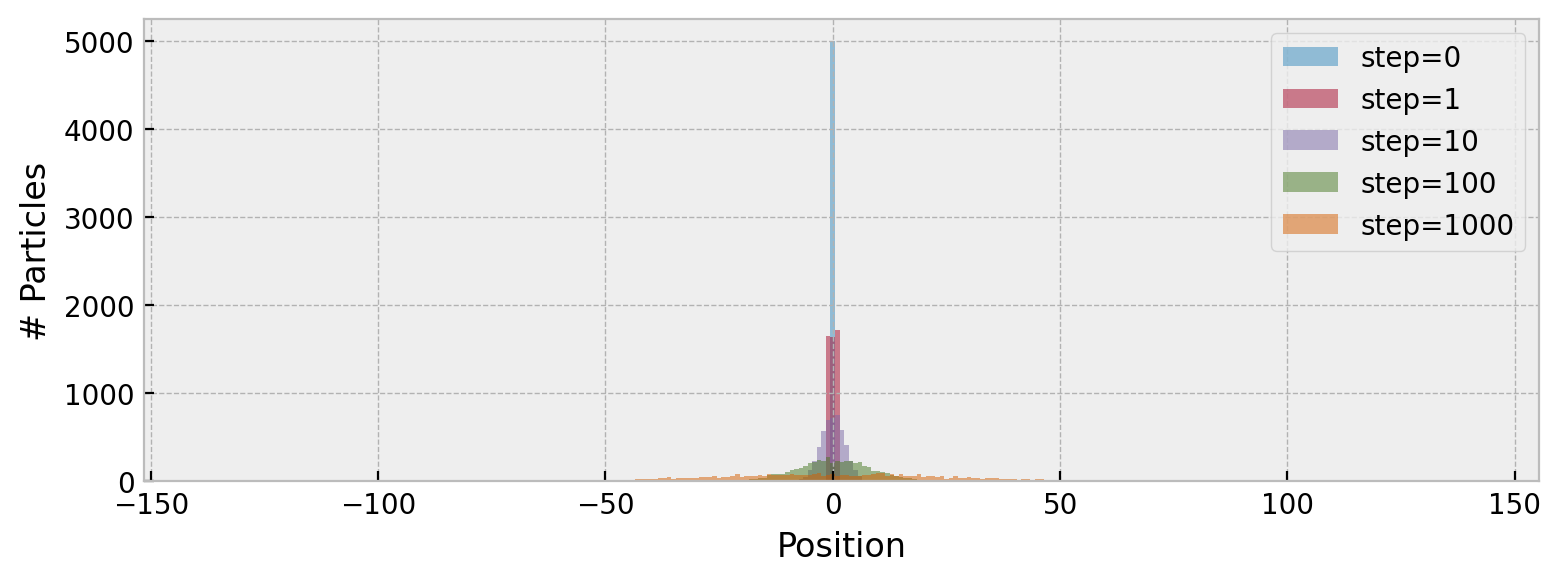

In [16]:
# histogram bins of width 1 that span all particle positions
bin_edges = np.arange(pos.min() - 0.5, pos.max() + 0.5 + 1)

# plot the distribution of positions for selected time steps
plt.figure(figsize=[9,3])
for t in [0, 1, 10, 100, 1000]:
    plt.hist(pos[t,:], bin_edges, alpha=0.5, label=f"step={t}")
plt.xlabel('Position')
plt.ylabel('# Particles')
plt.legend();

Let's put the visualization code in a function too.

In [17]:
def vis_random_walk_1d(positions, vis_steps):
    
    # histogram bins of width 1 that span all particle positions
    bin_edges = np.arange(positions.min() - 0.5, positions.max() + 1.5)

    # plot the distribution of positions for selected time steps
    for t in vis_steps:
        plt.hist(positions[t], bin_edges, alpha=0.5, label=f"step={t}")
    
    plt.xlabel('Position')
    plt.ylabel('# Particles')
    plt.legend()

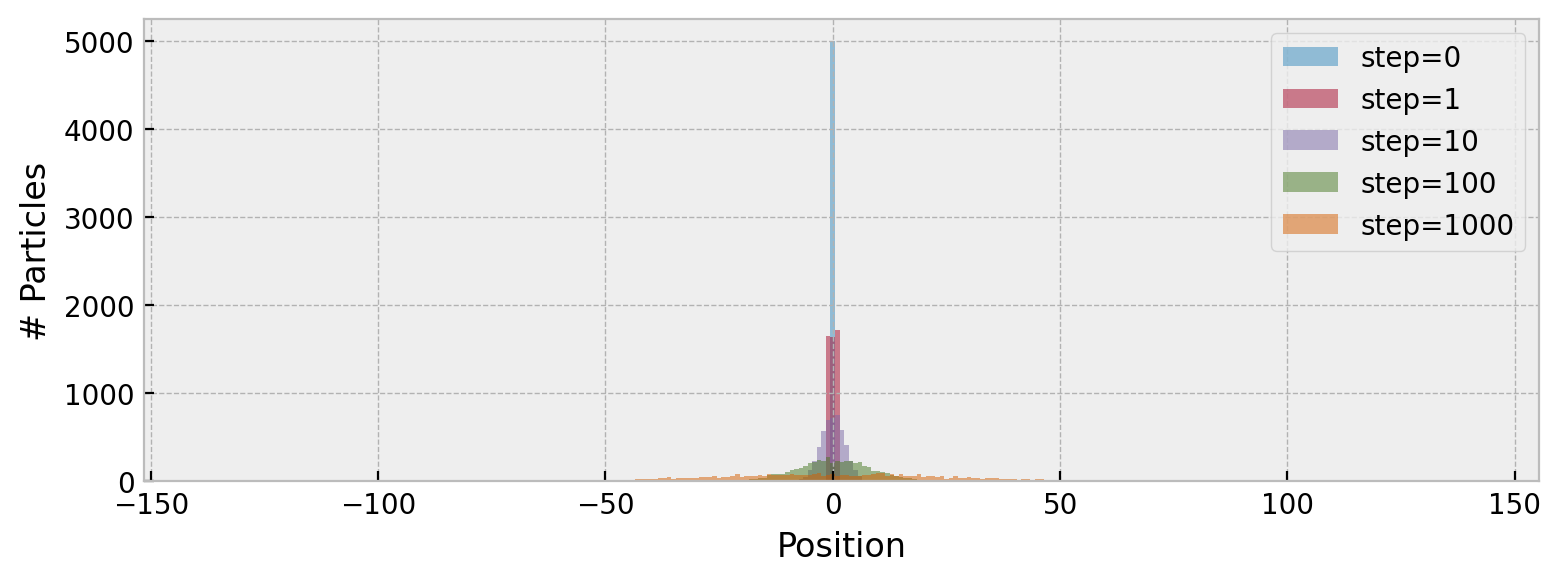

In [18]:
plt.figure(figsize=[9,3])
vis_random_walk_1d(pos, [0, 1, 10, 100, 1000])

Let's zoom in so we can see what's happening better.

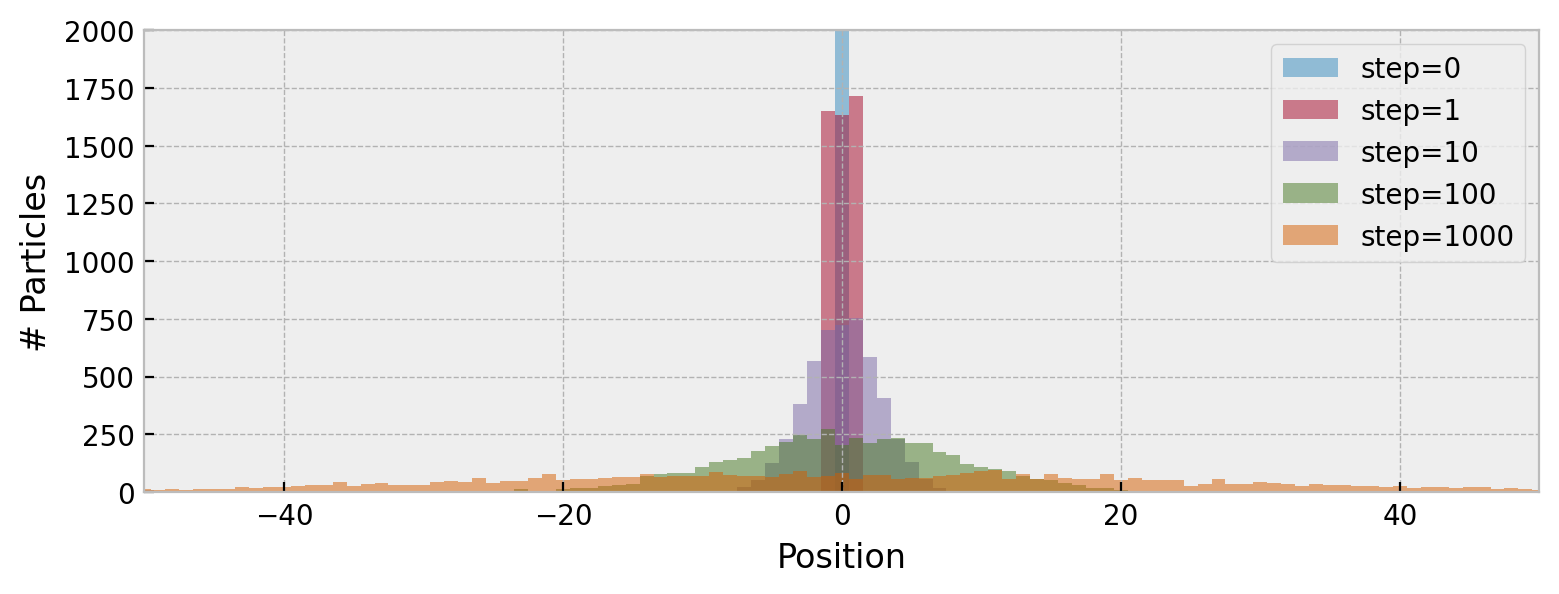

In [19]:
plt.figure(figsize=[9,3])
vis_random_walk_1d(pos, [0, 1, 10, 100, 1000])
plt.xlim([-50, 50])
plt.ylim([0, 2000]);

*You don't need to know how to do this for this class*, but you can include **interactive widgets** that are fun!

They requires the `ipywidgets` package (you may need to restart JupyterLab after installing).

*I'm not going to teach you how to do this.*

In [20]:
from ipywidgets import interact, IntSlider, Layout

def random_walk_1d_slider_plot(positions):
    
    n_steps, n_particles = positions.shape
    
    bin_edges = np.arange(positions.min(), positions.max() + 1)
    
    def show_step(t):
        plt.figure(figsize=[9,3])
        counts, bins, patches = plt.hist(positions[t], bin_edges)
        plt.xlabel('Position')
        plt.ylabel('# Particles')
        plt.xlim([bin_edges[0], bin_edges[-1]])
        plt.ylim([0, max(counts.max(), n_particles / 5)])
    
    step_slider = IntSlider(value=0, min=0, max=n_steps-1, step=1,
                            description='time step',
                            layout=Layout(width='100%'))
    
    interact(show_step, t=step_slider)

What does this look like to you?

In [21]:
random_walk_1d_slider_plot(pos)

interactive(children=(IntSlider(value=0, description='time step', layout=Layout(width='100%'), max=1999), Outp…

### What do random walks tell us about diffusion?

<img src="images/diffusion.jpg" width="50%">

### Diffusion in neural signaling

<img src="images/synapse.png" width="50%">

# 2-D discrete random walk

<img src="images/random-walk-2d.gif" width="100%">

Consider a bunch of particles randomly hopping around on a two-dimensional grid.

Each particle starts at position (0, 0).

During each time step of the simulation each particle has equal probability to move either -1, 0, or +1 along each of the two dimensions.

Keep track of every particle's position throughout the simulation.

### Step 1. Decide how you are going to store the data for the simulation.


*Try to think about this on your own without looking ahead at the following cell.*

<img src="images/random-walk-2d-3darray.drawio.svg" width="50%">

### Step 2. Decide how you are going to update the simulation on each time step.


*Try to think about this on your own without looking ahead at the following cell.*

For the first time step...

<img src="images/random-walk-2d-t1.drawio.svg" width="75%">

For the second time step...

<img src="images/random-walk-2d-t2.drawio.svg" width="75%">

### Step 3. Code your simulation.

In [22]:
def random_walk_2d(n_particles, n_steps):
    
    # We'll do this together,
    # but y'all will direct me...
    pass

In [23]:
def random_walk_2d(n_particles, n_steps):
    
    # allocate memory for storing all particle positions across all time steps
    positions = np.zeros([n_particles,2,n_steps], dtype=int)
    
    for t in range(1, n_steps):
        
        # random moves in x and y for all particles
        random_moves = np.random.choice([-1, 0, 1], size=[n_particles,2])
        
        # add random moves to all previous particle positions
        positions[:,:,t] = positions[:,:,t-1] + random_moves
    
    return positions

### Step 4. Run your simulation.

In [24]:
pos = random_walk_2d(5000, 2000)

pos.shape

(5000, 2, 2000)

### Step 5. Decide how you are going to visualize your simulation.

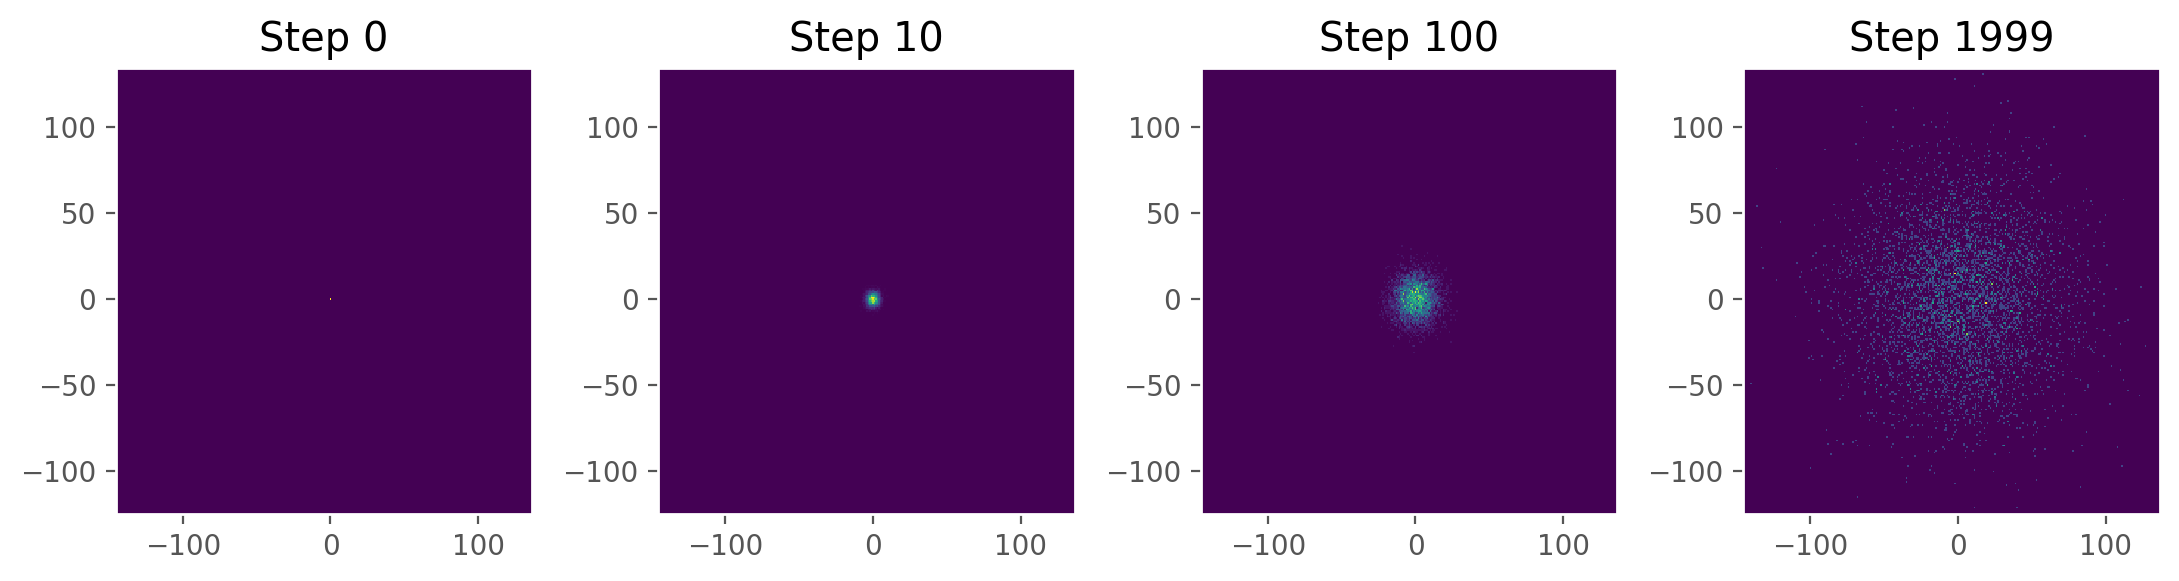

In [25]:
steps = [0, 10, 100, 1999]
x = pos[:,0,:]
y = pos[:,1,:]
x_bin_edges = np.arange(x.min() - 0.5, x.max() + 1.5)
y_bin_edges = np.arange(y.min() - 0.5, y.max() + 1.5)

plt.style.use('ggplot')
plt.figure(figsize=[11,3])
for i, t in enumerate(steps):
    x = pos[:,0,t]
    y = pos[:,1,t]
    plt.subplot(1, 4, i+1)
    plt.hist2d(x, y, [x_bin_edges, y_bin_edges])
    plt.title(f"Step {t}")
plt.tight_layout();

*You do NOT need to know how to do the following interactive plot.* Plotting representative time steps as above is good enough in most cases.

In [26]:
def random_walk_2d_slider_plot(positions):
    
    n_particles, n_dims, n_steps = positions.shape

    bin_edges = np.arange(positions.min() - 0.5, positions.max() + 1.5)
    
    plt.style.use('ggplot')

    def show_step(t):
        x = positions[:,0,t]
        y = positions[:,1,t]
        plt.figure(figsize=[5,5])
        plt.hist2d(x, y, [bin_edges, bin_edges])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim([bin_edges[0], bin_edges[-1]])
        plt.ylim([bin_edges[0], bin_edges[-1]])

    step_slider = IntSlider(value=0, min=0, max=n_steps-1, step=1,
                            description='time step',
                            layout=Layout(width='100%'))

    interact(show_step, t=step_slider)

In [27]:
random_walk_2d_slider_plot(pos)

interactive(children=(IntSlider(value=0, description='time step', layout=Layout(width='100%'), max=1999), Outp…

# Exercise

For the 2-D random walk above, constrain the particles to the region `-25 < x < 25`. Use reflective boundaries where any particle attempting to move to position x = 25 will be reflected back to position x = 24, and analogously for the boundary at position x = -25. You can use the `random_walk_2d_slider_plot` function above to visualize your results.

In [28]:
def random_walk_2d_constrained(n_particles, n_steps):
    
    # allocate memory for storing all particle positions across all time steps
    positions = np.zeros([n_particles,2,n_steps], dtype=int)
    
    for t in range(1, n_steps):
        
        # random moves in x and y for all particles
        random_moves = np.random.choice([-1, 0, 1], size=[n_particles,2])
        
        # add random moves to all previous particle positions
        positions[:,:,t] = positions[:,:,t-1] + random_moves
        
        # constrain particles to within -25 < x < 25
        # ...
    
    return positions

# Exercise Key

For the 2-D random walk above, constrain the particles to the region `-25 < x < 25`. Use reflective boundaries where any particle attempting to move to position x = 25 will be reflected back to position x = 24, and analogously for the boundary at position x = -25. You can use the `random_walk_2d_slider_plot` function above to visualize your results.

In [29]:
def random_walk_2d_constrained(n_particles, n_steps):
    
    # allocate memory for storing all particle positions across all time steps
    positions = np.zeros([n_particles,2,n_steps], dtype=int)
    
    for t in range(1, n_steps):
        
        # random moves in x and y for all particles
        random_moves = np.random.choice([-1, 0, 1], size=[n_particles,2])
        
        # add random moves to all previous particle positions
        positions[:,:,t] = positions[:,:,t-1] + random_moves
        
        # constrain particles to within -25 < x < 25
        x = positions[:,0,t]
        x[x <= -25] = -24
        x[x >= 25] = 24
    
    return positions

In [30]:
pos = random_walk_2d_constrained(5000, 2000)

In [31]:
random_walk_2d_slider_plot(pos)

interactive(children=(IntSlider(value=0, description='time step', layout=Layout(width='100%'), max=1999), Outp…

# Exercise

Pick a single particle and plot it's path throughout the entire simulation.

# Exercise Key

Pick a single particle and plot it's path throughout the entire simulation.

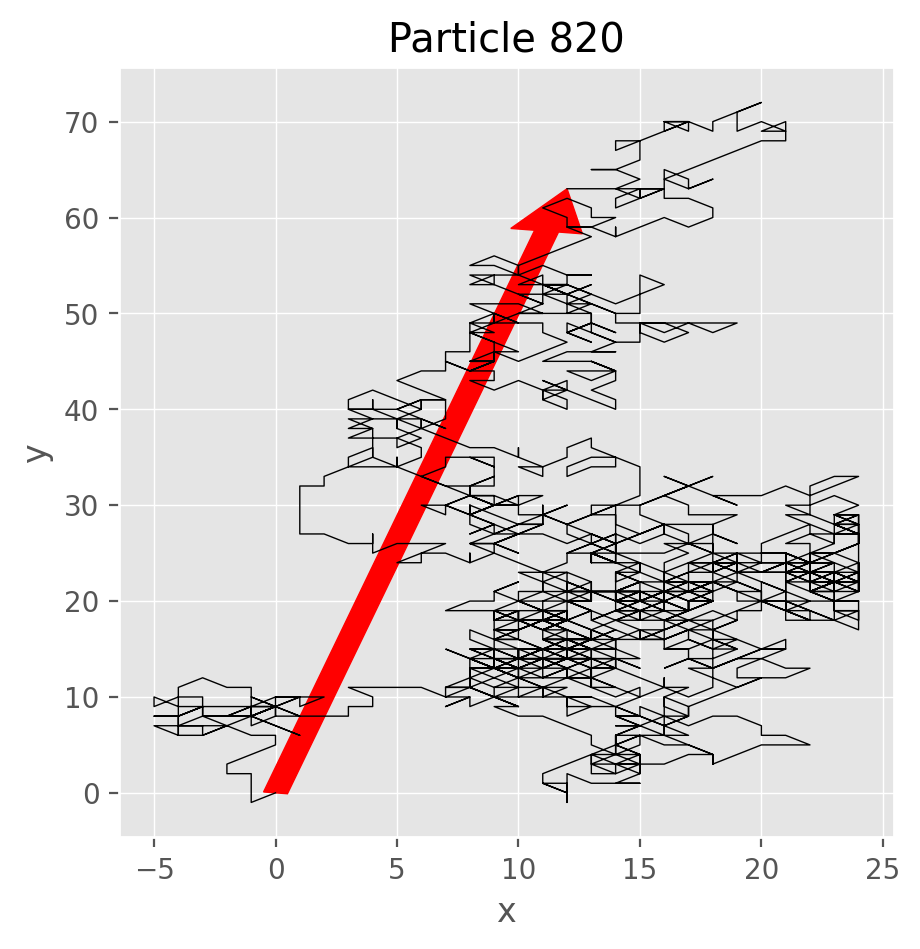

In [41]:
i = 820  # particle index
x = pos[i,0,:]
y = pos[i,1,:]

plt.figure(figsize=[5,5])
plt.plot(x, y, lw=0.5, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Particle {i}')
plt.arrow(x[0], y[0], x[-1] - x[0], y[-1] - y[0], width=1, color='red', length_includes_head=True);

### Learning goals - *Random walk lab*

|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will get practice working with and visualizing multi-dimensional data arrays in the context of an actual simulation.</div> | If you learn anything about random walks or diffusion, that's an added bonus. |